<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/CST3512_Class13_NLP_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Natural Language Processing    

*CST3512 Data and Information Management - II*

**Class 13/14**    

*Created by Professor Patrick: 02-Mar-2022 | updated: 14-Mar-2023 |

The content of this notebook is derived from several sources including:
*  **Basic Concepts of Natural Language Processing (NLP) Models and Python Implementation** by Prasun Biswas in [Toward Data Science](https://towardsdatascience.com/basic-concepts-of-natural-language-processing-nlp-models-and-python-implementation-88a589ce1fc0), 01-Jul-2021   
*  **What Is the Difference Between Stemming and Lemmatization?** from [StackOverflow](https://stackoverflow.com/questions/1787110/what-is-the-difference-between-lemmatization-vs-stemming)    
*  **Beginners Guide to Stemming in Python NLTK** from [MachineLearningKnowldge.ai](https://machinelearningknowledge.ai/beginners-guide-to-stemming-in-python-nltk/)    
* **A simple yet effective guide on Natural Language Processing(NLP) using Python** Nov 8, 2020 by Prateek Nima from [Medium](https://medium.com/analytics-vidhya/a-simple-yet-effective-guide-on-natural-language-processing-nlp-using-python-44599488bf20)   



For a human it’s pretty easy to understand language but machines are not capable to recognize it easily.  Natural Language Processing (NLP) enables computers to interpret and to understand the way humans communicate using language.  But NLP does not interpret language the same way humans understand language.

### NLTK (Natural Language ToolKit)    

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning. This notebook steps through the basics of NLP using the NLTK in Python.

### Initial Housekeeping (NLTK)    

First, import requisite libraries and access desired data sources    


In [1]:
# Setup wordcloud and nltk
!pip install -q wordcloud
import wordcloud
import nltk

In [ ]:
# Download and import book sources from nltk
nltk.download('book') 
from nltk.book import *

In [3]:
# Get stopwords for English language from NLTK
stopwords = nltk.corpus.stopwords.words('english')

In [4]:
# Get WordTokenize to tokenize word concepts 
from nltk.tokenize import word_tokenize

In [5]:
# Get Lemmatizer and Stemmer (Porter, Snowball, Lancaster, Regexp) from NLTK
# The Snowball Stemmer may be preferred as it is more modern

# Get PorterStemmer from NLTK
porter_stemmer = nltk.stem.PorterStemmer()

# Get SnowballStemmer from NLTK
# SnowballStemmer needs a language parameter set
snowball_stemmer = nltk.stem.SnowballStemmer(language='english')

# Get LancasterStemmer from NLTK
lancaster_stemmer = nltk.stem.LancasterStemmer()

# Get the RegexpStemmer from NLTK
from nltk.stem import RegexpStemmer
# Instances of RegexpStemmer require a regex as a positional argument
# RegexpStemmer calls may also provide a kwarg for min(imum) length
regexp_stemmer = nltk.stem.RegexpStemmer('ing$|s$|e$|able$', min=4)

# Get Lemmatizer from NLTK
lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
# Download for current Lemmatization reference
nltk.download('omw-1.4')

In [ ]:
# Get tokeniation (tagging) capability for parts of speech using spacy library
import spacy
# Get Tokenizer class from spacy module
from spacy.tokenizer import Tokenizer
# Instantiate an nlp object with "en_core_web_sm" argument
nlp = spacy.load("en_core_web_sm")

In [8]:
# Import regular expressions for searches and filtering
import re



---



Natural languages are a free form of text which are unstructured in nature. Cleaning and preparing the text data to extract features is very important for an NLP approach to develop any model(s). This notebook covers the basic but important steps and shows how to implement them in Python using NLTK and other packages with the goal of developing an NLP-based classification model.

The following phases of the approach will be described:

A. NLP Data Wrangling and Tokenization        
B. Vectorization/Word Embedding    
C. Model Development

## A. NLP Data Wrangling and Tokenization (NLTK)       

Data cleaning is a basic but very important step in NLP. This section includes a few steps in an approach for data cleaning.  Depending on the source and nature of the text data being analyzed, new steps may be added and the steps considered may be refined.  As with any data science analysis, a continuos improvement approach is recommended where learnings are applied to every step in the approach and not just to final analysis and presentation.     


---

**Example Line of Text**

For this exercise a simple line of text is created through the assignment of a string to the variable `line`.    

Choose one of the following assignment statements to prepare the variable `line` with text you will process, or add a new assignment with any text you like assigned to the variable `line`.

In [9]:
# using a moderately complex single line of text
line = 'Reaching out for HELP. Please meet me in LONDON at 6 a.m xyz@abc.com #urgent!'

In [ ]:
# using the Gettysburg Address
line = """  Four score and seven years ago our fathers brought forth on this
continent a new nation, conceived in liberty and dedicated to the
proposition that all men are created equal. Now we are engaged in
a great civil war, testing whether that nation or any nation so
conceived and so dedicated can long endure. We are met on a great
battlefield of that war. We have come to dedicate a portion of
that field as a final resting-place for those who here gave their
lives that that nation might live. It is altogether fitting and
proper that we should do this. But in a larger sense, we cannot
dedicate, we cannot consecrate, we cannot hallow this ground.
The brave men, living and dead who struggled here have consecrated
it far above our poor power to add or detract. The world will
little note nor long remember what we say here, but it can never
forget what they did here. It is for us the living rather to be
dedicated here to the unfinished work which they who fought here
have thus far so nobly advanced. It is rather for us to be here
dedicated to the great task remaining before us--that from these
honored dead we take increased devotion to that cause for which
they gave the last full measure of devotion--that we here highly
resolve that these dead shall not have died in vain, that this
nation under God shall have a new birth of freedom, and that
government of the people, by the people, for the people shall
not perish from the earth. """

In [ ]:
# create your own assignment of text to `line` here   

# line = """ """


---

###1. Transform to lower case    

Convert all the text to lowercase to maintain uniformity in subsequent analysis.  Of course, all text could just as easily be converted to upper case, but it is generally accepted practice to work with text all in lower case.    


In [ ]:
# the line variable string before transforming to lower case
print(line)

In [ ]:
# Display text before transformation to lower case
print('The original text:\t\t', line)
# Transform text to lower case
line = line.lower()
# Display text after transformation to lower case
print('The text after .lower():\t', line)

The code example beloew works with a different example text that the preview `line` variable. A lower case version of the text to be analyzed is generated using the `.lower()` method in the following example.  If the data cleaning steps were to be performed in a logical sequence, transforming to lower case would be done first.  The two may, of course be combined as they are in the code example below.    


### 2. Tokenization    



Tokenization is the process of breaking text down into words (which are representative of concepts) and can be achieved through several methods.  The particular method applied can be selected and refined based upon the nature of the source of the text and the use case for the analysis.    

In other data science work the fundamental task of tokenization has been performed using something as straightforward as the `split()` string method.  Three methods are presented here:    
1. **split()**    
2. **Regex**    
3. **NLTK**    

**Tokenization Using `split()` Method**  

The following example assigns the text from the string `line` to a new string `split_tokenized_line` and then applies the `split()` method to the new string.

In [ ]:
# Display the text string before tokenization
print('Line is: ', line)

In [ ]:
# Use the split() method to tokenize a string of text

# Tokenize the string into a list using the .split() method
split_tokenized_line = line.split(' ')
# Display the list of tokenized words from the .split() method
print('List of tokens based on .split():', split_tokenized_line)

Notice in the example above that the `split()` method is simply parsing the string into a list of distrinct strings based on occurrences of the delimiter character, which by default is a space (' ').  The `split()` [method may be given a different character as a delimiter](https://www.w3schools.com/python/ref_string_split.asp).  Regardless of the delimiter character used, parsing based on a single character results in a list of strings which may contain punctuation and other noise. 

**Tokenization Using Regular Expression (Regex)**        

A bit more sophistication may be achievable by employing the use of regular expressions (regex) to perform tokenization of text into a list of word strings as the following code demonstrates.    


In [ ]:
# Display the text string before tokenization
print('Line is: ', line)

In [ ]:
# Using regular expressions to tokenize a string of text

# Tokenize the string into a list using the Regexp method
regex_tokenized_line = re.findall(r"[\w]+", line)
# Display the list of tokenized words from the Regex method
print('List of tokens based on re.find():', regex_tokenized_line)

The tokenized example above results in a list which more accurately repersents the words in the line of text though some content such as the time of day and email address have been fragmented into pieces which have lost the original meaning. 

**Tokenization Using NLTK**      

Because of the complexities of working with natural language it can be seen that a simple method of tokenization using the `split()` method is not adequate, nor is a somewhat more advanced method of using regular expressions.    

Fortunately, the NLTK toolkit provides some more sophisticated means of tokenizaion of natural language text as the code in the following examples demonstrate.  There are three methods of tokenization available in NLTK:    
1. NLTK Word Tokenizer    
2. NLTK Regexp Tokenizer    
3. NLTK WhiteSpace Tokenizer    


**NLTK Word Tokenizer**    

The following code provides an example of the tokenization of a string of text using the NLTK Word Tokenizer method. 

In [ ]:
# Display the text string before tokenization
print('Line is: ', line)

In [ ]:
# Using NLTK `word_tokenize()` to tokenize a string of text
# This method requires the following import
# from nltk import word_tokenize

# Tokenize the string into a list using the word_tokenize() method
nltkword_tokenized_line = word_tokenize(line)
# Display the list of tokenized words from the Regex method
print('The word_tokenize result is: ', nltkword_tokenized_line)

**NLTK Regexp Tokenizer**    

The following code provides an example of the tokenization of a string of text using the NLTK Regexp Tokenizer method. 

In [ ]:
# Display the text string before tokenization
print('Line is: ', line)

In [ ]:
# Using NLTK RegexpTokenizer to tokenize a string of text

# Tokenize the string into a list using the RegexpTokenizer method
reg_tokenizer = nltk.tokenize.RegexpTokenizer(r"[A-Za-z]+")
nltkregexp_tokenized_line = reg_tokenizer.tokenize(line)
# Display the list of tokenized words from the Regex method
print('The NLTK Regexp_tokenize result is: ', nltkregexp_tokenized_line)

**NLTK WhiteSpace Tokenizer**    

The following code provides an example of the tokenization of a string of text using the NLTK WhiteSpace Tokenizer method. 

In [ ]:
# Display the text string before tokenization
print('Line is: ', line)

In [ ]:
# Using NLTK WhiteSpaceTokenizer to tokenize a string of text

# Tokenize the string into a list using the WhiteSpace Tokenizer method
# Using NLTK RegexpTokenizer to tokenize a string of text
space_tokenizer = nltk.tokenize.WhitespaceTokenizer()
nltkwspace_tokenized_line = space_tokenizer.tokenize(line)
# Display the list of tokenized words from the Regex method
print('The NLTK WhitespaceTokenizer result is: ', nltkwspace_tokenized_line)

**Comparing the  `split`, `regex`, `nltk` methods of tokenization**

In [ ]:
print('Original line of text:')
print(line, '\n')
print('Text tokenized with split():')
print(split_tokenized_line, '\n')
print('Text tokenized with Regex:')
print(regex_tokenized_line, '\n')
print('Text tokenized with NLTK Word:')
print(nltkword_tokenized_line, '\n')
print('Text tokenized with NLTK Regexp:')
print(nltkregexp_tokenized_line, '\n')
print('Text tokenized with NLTK WhiteSpace:')
print(nltkwspace_tokenized_line, '\n')



---



### Tokenizaton with `Tensorflow`    
    
This section works with the **Google - NLP Zero to Hero** series of videos and exercises.    

  - [Part 1 Introduction Video](https://youtu.be/fNxaJsNG3-s)    
  - [The Google - NLP Zero to Hero playlist (on YouTube)](https://goo.gle/nlp-z2h)    
  - [Colab notebook for Part 1 Introduction Video](https://goo.gle/2uO6Gee) 




<c><font color='green'>**This is a good time to watch the [Google - NLP Hero to Zero: Part 1 Introduction Video](https://youtu.be/fNxaJsNG3-s) if you have not already seen it.**</font></c>     


Here is the code from the Colab notebook mentioned in the **Google - NLP Zero to Hero: Part 1 Introduction** video:     

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'i love my Dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)



---



###3. Remove stopwords    

There are words which are very commonly used but have little meaning when humans use language, those words do not add much value. Depending on the source of data and analysis to be performed, there may be words which are not required for the natural language processing approach. It is best to delete these words from the data.  The set of words to be deleted because they add little value is referred to as **stopwords** in NLP.    

**Stop Words** -  a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.    
 
We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words.     

NLTK(Natural Language Toolkit) in Python has a list of stopwords stored in 16 different languages. Find them in the nltk_data directory: home/pratima/nltk_data/corpora/stopwords is the directory address.(Do not forget to change your home directory name)    


This example focuses on English-language stopwords but, of course, every language and use case may have its own set of stopwords.


**Using NLTK to Remove Stopwords**



In [ ]:
# from nltk.corpus import stopwords             # already done
# from nltk.tokenize import word_tokenize       # already done
 
example_sentence = """This is a sample sentence,
                  showing off the stop words filtration."""
 
# stop_words = set(stopwords.words('english'))  # deprecate for stopwords
 
word_tokens = word_tokenize(example_sentence)
 
filtered_sentence = [w for w in word_tokens if not w.lower() in stopwords]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stopwords:
        filtered_sentence.append(w)
 
print(word_tokens)
print(filtered_sentence)

*The following code extends the list of stopwords to use.*

Applying the extended list of stopwords to the list.

In [ ]:
# Additional stopwords
extra_list = ['let', 'may', 'might', 'must', 'need', 'apologies', 'meet']
# Extending the list of stopwords
stopwords.extend(extra_list)
# Display the extended list of stopwords
print('Stopwords to use:', stopwords)

**Lemmatization and Stemming**

Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.

Stemming is the process of reducing the word to its word stem that affixes to suffixes and prefixes or to roots of words known as a lemma. In simple words stemming is reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem. For example – The words care, cared and caring lie under the same stem ‘care’. Stemming is important in NLP as an alternative to Lemmatizing.


Sometimes, the same word can have multiple different Lemmas. We should identify the Part of Speech (POS) tag for the word in that specific context. Here are the examples to illustrate all the differences and use cases:

1. If you lemmatize the word 'Caring', it would return 'Care'. If you stem, it would return 'Car' and this is erroneous.
2. If you lemmatize the word 'Stripes' in verb context, it would return 'Strip'. If you lemmatize it in noun context, it would return 'Stripe'. If you just stem it, it would just return 'Strip'.
3. You would get same results whether you lemmatize or stem words such as walking, running, swimming... to walk, run, swim etc.
4. Lemmatization is computationally expensive since it involves look-up tables and what not.     

If you have a large dataset and performance is an issue, go with Stemming. Remember you can also add your own rules to Stemming. If accuracy is paramount and dataset isn't humongous, go with Lemmatization.

*source: StackOverflow, [What Is the Difference Betweem Stemming and Lemmatization?](https://stackoverflow.com/questions/1787110/what-is-the-difference-between-lemmatization-vs-stemming)*


**Glossary**    

* **whitespace tokenizer** - a tokenizer that splits on and discards only whitespace characters returning individual words or terms as tokens.    

* **Porter Stemming** - The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the most common morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.    

* **Snowball Stemmer** - This algorithm is also known as the Porter2 stemming algorithm. It is almost universally accepted as better than the Porter stemmer, even being acknowledged as such by the individual who created the Porter stemmer.    

* **Lancaster Stemmer** - is simple but it tends to produce results with over stemming. Over-stemming causes the stems to be not linguistic, or they may have no meaning.    

* **Regexp Stemmer** - uses regular expressions (regex) to identify morphological affixes. Any substrings that match the regular expressions will be removed.


###4. Lemmatization    

Lemmatization helps to reduce the words into a single form taking the context of the use of the word into consideration.  The resultant term from Lemmatization is called a lemma. The following example defines a function to use a Lemmatization method from NLTK.  Other methods may prove more effective depending on the data source and use case.

In [ ]:
# Define a function to Lemmatize text and to tokenize based on whitespace
# if it has not been downloade before, execute the following download
# nltk.download('omw-1.4')

def lemmatize_text(text):
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# Display the line without tokenization and Lemmatization
print('The line without tokenization and Lemmatization: \n', line)
# Invoke the function defined above and display result
lemma_line = lemmatize_text(line) 
print('The line after tokenization and Lemmatization: \n', lemma_line)


###5. Stemming    

Stemming is a faster, more efficient way to attempto to reduce words into their root form. As mentioned earlier, there is a trade-off of accuracy in return for the efficiency of stemming vs. Lemmatization.  The following example defines a function to perform whitespace tokenization and stemming of a line of text then invokes that function.  In this example the NLTK Porter method of stemming is used.  Depending on the nature of the source text and the use case(s) for the analysis, different methods may be considered for stemming. 

**Porter Stemming**

In [ ]:
# Define function for Porter stemming of text tokenized for whitespaces
def stem_porter(text):
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    ps = nltk.PorterStemmer()
    return [ps.stem(w) for w in w_tokenizer.tokenize(text)]
# Display the original line
print('The line without Porter Stemming: \n', line)
# Invoke the method defined for Porter stemming and display the result
porter_stem_line = stem_porter(line)
print('The line after Porter Stemming: \n', porter_stem_line)

**Snowball Stemming**    

A few common rules of Snowball stemming are:    
* ILY  -----> ILI    
* LY   -----> `Nill`    
* SS   -----> SS    
* S    -----> `Nill`    
* ED   -----> E, `Nill`    

**Nill** means the suffix is replaced with nothing and is just removed.    

There may be cases where these rules vary depending on the words. As in the case of the suffix ‘ed’ if the words are ‘cared’ and ‘bumped’ they will be stemmed as ‘care‘ and ‘bump‘. Hence, here in cared the suffix is considered as ‘d’ only and not ‘ed’. 

The word ‘stemmed‘ is replaced with the word ‘stem‘ and not ‘stemmed‘. Therefore, the suffix depends on the word.

Here are a few examples:-
```
WORD           STEM
cared          care
university     univers
fairly         fair
easily         easili
singing        sing
sings          sing
sung           sung
singer         singer
sportingly     sport
```

In [ ]:
# Define function for Snowball stemming of text tokenized for whitespaces
def stem_snowball(text):
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    # Bear in mind that the Snowball stemmer needs language defined
    ps = nltk.SnowballStemmer(language='english')
    return [ps.stem(w) for w in w_tokenizer.tokenize(text)]
# Display the original line
print('The line without Snowball Stemming: \n', line)
# Invoke the method defined for Snowball stemming and display the result
snowball_stem_line = stem_snowball(line)
print('The line after Snowball Stemming: \n', snowball_stem_line)

**Lancaster Stemmer**    

There is a third method of stemming available, Lancaster Stemming. 

Lancaster Stemmer is simple but it tends to produce results with over stemming. Over-stemming causes the stems to be not linguistic, or they may have no meaning.

In NLTK, there is a module LancasterStemmer() that supports the Lancaster stemming algorithm.  The following code shows an example of the application of Lancaster Stemming along with whitespace tokenization.    


In [ ]:
# Define function for Lancaster stemming of text tokenized for whitespaces
def stem_lancaster(text):
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    # Bear in mind that the Lancaster stemmer needs language defined
    ps = nltk.LancasterStemmer()
    return [ps.stem(w) for w in w_tokenizer.tokenize(text)]
# Display the original line
print('The line without Lancaster Stemming: \n', line)
# Invoke the method defined for Lancaster stemming and display the result
lancaster_stem_line = stem_lancaster(line)
print('The line after Lancaster Stemming: \n', lancaster_stem_line)

**RegexpStemmer**

Regex stemmer uses regular expressions to identify morphological affixes. Any substrings that match the regular expressions will be removed.

In NLTK, there is a module `RegexpStemmer()` that supports the Regex stemming algorithm.

In [ ]:
# Define function for Regexp stemming of text tokenized for whitespaces
def stem_regexp(text):
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    # Bear in mind that the Regexp stemmer needs a regex defined
    ps = nltk.RegexpStemmer('ing$|s$|e$|able$', min=4)
    return [ps.stem(w) for w in w_tokenizer.tokenize(text)]
# Display the original line
print('The line without Regexp Stemming: \n', line)
# Invoke the method defined for Regexp stemming and display the result
regexp_stem_line = stem_regexp(line)
print('The line after Regexp Stemming: \n', regexp_stem_line)

*Display of the result of Lemmatization vs. the four methods of stemming compared with the original text follow.  The following code requires the execution of each of the five snippets above to create the variables to print.*

In [ ]:
print("Lemmatization:")
print(lemma_line, "\n")
print("Porter Stemming:")
print(porter_stem_line, "\n")
print("Snowball Stemming:")
print(snowball_stem_line, "\n")
print("Lancaster Stemming:")
print(lancaster_stem_line, "\n")
print("Regexp Stemming with `'ing$|s$|e$|able$', min=4'`:")
print(regexp_stem_line, "\n")

**More Comparative Examples of Stemming**    

In [ ]:
# STEMMING EXAMPLE 1
# from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, RegexpStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language='english')
regexp = RegexpStemmer('ing$|s$|e$|able$', min=4)

word_list = ["friend", "friendship", "friends", "friendships"]

# word_list = ['aria', 'arial', 'arid', 'iris']

print("{0:20}{1:20}{2:20}{3:30}{4:40}".format("Word","Porter Stemmer","Snowball Stemmer","Lancaster Stemmer",'Regexp Stemmer'))
for word in word_list:
    print("{0:20}{1:20}{2:20}{3:30}{4:40}".format(word,porter.stem(word),snowball.stem(word),lancaster.stem(word),regexp.stem(word)))

In [ ]:
# STEMMING EXAMPLE 2
# from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, RegexpStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language='english')
regexp = RegexpStemmer('ing$|s$|e$|able$', min=4)

word_list = ['run','runs','running','ran', 'runner', 'easily','fairly', 'sportingly']

print("{0:20}{1:20}{2:20}{3:30}{4:40}".format("Word","Porter Stemmer","Snowball Stemmer","Lancaster Stemmer",'Regexp Stemmer'))
for word in word_list:
    print("{0:20}{1:20}{2:20}{3:30}{4:40}".format(word,porter.stem(word),snowball.stem(word),lancaster.stem(word),regexp.stem(word)))

**Difference Between Porter Stemmer and Snowball Stemmer**

Snowball Stemmer is more aggressive than Porter Stemmer.
Some issues in Porter Stemmer were fixed in Snowball Stemmer.
There is only a little difference in the working of these two.
Words like ‘fairly‘ and ‘sportingly‘ were stemmed to ‘fair’ and ‘sport’ in the snowball stemmer but when you use the porter stemmer they are stemmed to ‘fairli‘ and ‘sportingli‘.    

The difference between the two algorithms can be clearly seen in the way the word ‘Sportingly’ in stemmed by both. Clearly Snowball Stemmer stems it to a more accurate stem.

**Drawbacks of Stemming**    

Issues of over stemming and under stemming may lead to not so meaningful or inappropriate stems.    

Stemming does not consider how the word is being used. For example – the word ‘saw‘ will be stemmed to ‘saw‘ itself but it won’t be considered whether the word is being used as a noun or a verb in the context. For this reason, Lemmatization is used as it keeps this fact in consideration and will return either ‘see’ or ‘saw’ depending on whether the word ‘saw’ was used as a verb or a noun.

###6. Removal of Patterns with Regular Expressions   

Regular expressions (regex) help to identify and to get rid of different patterns which are not required in the text.


In [ ]:
# line = line.lower()
print("Line:", line)
print("...cleaning...\n")

clean0 = line
clean1 = re.sub('\S*@\S*\s?'," ",clean0)            # email removal
clean2 = re.sub('\s+'," ",clean1)                   # new line character removal
clean3 = re.sub("\’"," ",clean2)                    # single quote removal
clean4 = re.sub('_'," ",clean3)                     # underscore removal
clean5 = re.sub('http\S*\s?'," ",clean4)            # link removal

clean = ' '.join([i for i in clean5.split() if i.find('#') < 0]) #remove hashtag
print("Clean line:", clean)

### 7. Parts-of-Speech (POS) tagging

Parts-of-speech tagging helps to identify the parts of speech. Based on the use case one can keep or remove some of them.  Parts-of-speech may be localized by dialect and other cultural factors (profession, age, etc.)

The following code is an example of parts-of-speech tagging using the `spacy` library.


In [ ]:
tokens_spacy = nlp(line)
for token in tokens_spacy:
    print(token.text, ': ', token.pos_, ': ', token.is_stop)

###8. Named-Entity-Recognition (NER)    

Named-entity-recognition helps to identify and categorize the different groups which includes names, places, currency etc.

The following code is an example of the use of named-entity-recognition using the `spacy` module. 

*The following code requires execution of the prior snippet of code to create the variable `tokens_spacy`.*

In [ ]:
for ent in tokens_spacy.ents:
    print(ent.text, ': ', ent.label_)

##B. Vectorization/Word-Embedding    

*More to come on this subject*    



NLP can be used for various purposes ors use cases including but not limited to:    
  - **Text Classification**  - 
Text classification is a process which helps to classify the text based on its content by analyzing and assigning tags to the elements (words or lemma) of text.

  - **Sentiment Analysis** - 
*Sentiment* is a synonym for emotion. Using sentiment analysis we can identify the nature of the opinion (favorable/unfavorable) of a text author.  Sentiment analysis can be performed across sources ranging from blogs, online reviews, social media posts, emails, transcripts of meetings, etc.  -- *pretty much any source*.

  - **Topic Modelling** - 
Topic modelling helps  to discover topics that occur in a document or a collection of documents.

  - **Parts of Speech (POS) tagging** - 
POS tagging is the process of marking up a word in a text to a particular part of speech. POS is one of the essential building blocks for lemmatizers which we looked at in the last section of this notebook.   


There are more areas where NLP can be used.    

This section of this notebook focuses on Text Classification (with word vectorization).  

As any with data science analysis the first step is data wrangling, to clean and transform the data which can then be recognized by computer algorithms and their component methods.

The most important library while working with NLP is the Natural Language Toolkit `NLTK` library. It consists of inbuilt functions such as tokenization, lemmatization, stemming etc. which are integral tools for cleaning and transforming the text data before we use NLP techniques.

This section of the notebook will repeat some of the housekeeping done early and add a few extra steps of housekeeping.


---

### Housekeeping (again with a little more)    
Import the requesite NLTK components for natural language processing.    

Import SKLEARN components for model building.    


In [ ]:
# import regular expressions
import re
# import the os / operating system library
import os
# impot pandas 
import pandas as pd
# import metrics from sklearn
from sklearn import metrics
# import word_tokenize tokenizer from nltk
from nltk.tokenize import word_tokenize
# import stopwordd
from nltk.corpus import stopwords
# import nltk 
import nltk 
# import PorterStemmer from NLTK for stemmitizatoin
from nltk.stem import PorterStemmer
# import sklearn for machine learning CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# import train_test_split from sklearn for model development
from sklearn.model_selection import train_test_split as ttsplit
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score
# import MultinomialNB from sklearn for naive bayesian function
from sklearn.naive_bayes import MultinomialNB

Creat some useful assignments

In [ ]:
# assign some useful aliases to imported objects
# assign sklearn CountVectorizer to the variable `vector`
vector = CountVectorizer()
# assign nltk PorterStemmer to the variable `stemming`
stemming = PorterStemmer()

Download some reference data

In [ ]:
# download some reference data
# download stopwords from nltk
nltk.download('stopwords')
# download punkt from nltk
nltk.download('punkt')
# download wordnet from nltk
nltk.download('wordnet')

Build a list of English language stopwords

In [ ]:
# assign english language stopwords to the variable stopwords_list
stopwords_list = stopwords.words('english')

---

### 0. Read the text file (delimited) into a DataFrame.    

The code in this section of the notebook works with a text file with file name `dataset.csv` and located in the current working directory.      

Change the qualified file name argument in the following cell if you intend to read a diffent source file for text. 


In [ ]:
# read the text dataset delimited by commas into a DataFrame
train_data = pd.read_csv("dataset.csv",delimiter=',', header=0)

In [ ]:
# Exploring the Dataframe 

# train_data.describe
# train_data.columns
train_data.head(10)

,text
0,It is not our abilities that show what we trul...


---


This section of the notebook will also add one preliminary data wrangling step which was not covered earlier in this notebook: **removal of rows with null values**.  There is no need to complicate the algorithm with null values for empty rows of text.   

### 1. Removal of Rows with `Null` values    

Although, the first working exercise considers a single sentence , when you are working with a real-world dataset you are dealing with millions of records at the same time.    

The first step is to check whether the current sentence is `null` or not. If it is `null`, then discard it and iterate through the next row. This is an essential step since it is quite common to deal with `null` values in a dataset or even when you are extracting data from any website.    

Try running this step after inserting some blank rows in `dataset.csv` to see removal of rows with `Null` values removed.    




---

### 2. Tokenization of Data    

Tokenization helps the computer to divide a sentence into words.  What the human brain analyzises, reading sentences word by word, has a computing parallel where the machine breaks content down into `tokens` instead of words.  Tokenization helps the model to deal with the concepts (tokens/words) one by one.

---

### 3. Removal of stopwords    

`Stopwords` are the most common words present in many sentences but which do not add value in the meaning of the content.  `Stopwords` are not necessary for analyzing the data. `Stopwords` include words such as ‘a’, ‘the’, ‘an’, ‘this’ and many others which need to be removed before any further processing.    

As mentioned earlier, some fields or domains of content may have their own incremental equivalents of `Stopword`.  When that is the case, extending the list of `Stopwords` is as easy as appending to that list.    

---

### 4. Removal of Non-Alphabetic Characters     
**(Punctuation, Whitespace, and Numbers)**     

In addition to removal of punctuation, for Vectorization/Word-embedding numbers are nor processed by the algorithm.  

Non-alphabetic text cannot be processed by the machine learning algorithms and have no impact by its presence in the data.  They are removed.   

---

### 5. Stemming/Lemmatization of Tokenized Words    

**Stemming** is a process of retrieving the root word from the given word. For example, a word like `dance`, `dancer` are different forms of the word `dance`. Without transforming these type of words to their root word the algorithm would end up making vectors for each word which is a variation of a concept which would exponentially increase the work required by the algorithms. The `nltk.stem` package provides us with stemmer which can be used to convert words into their root word.

**Lemmatization** can provide more effective results than **Stemming** though at an increased cost in computing power.   

Performance and accuracy objectives will determine whether to use **Stemming** or **Lemmatization** and which form of either of those is best to use in a particular circumstance.   


---

### 6. Combining the Words to form a Sentence    

Once the data wrangling has transformed the content to tokenized words (and their `stems` or `lemma`) those tokens will need to be combined into sentences before they are converted into a vectorized format.

The first exercise in this notebook uses the following line of dialogue from the movie **Harry Potter and the Chamber of Secrets**:

`“It is not our abilities that show what we truly are…it is our choices.”`

This steps transforms the concepts (tokens/stems/lemma) to an appropriate form before feeding it to the machine learning algorithm.      


*The following exhibit depicts the processing of the content in the first exercise.*


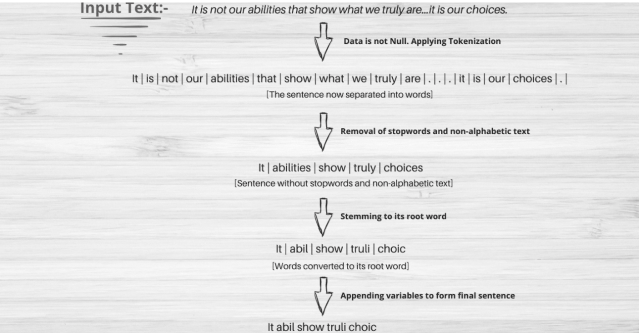

**Working Code to Process Steps 1 - 6**

In [ ]:
#Initializing variables
processed_data = []
arr = []
a = 0

for sentence in train_data['text']:
    if type(sentence) != str:
        #Drop the row if it is null
        train_data = train_data.drop([a],axis=0)
        arr.append(a)
        continue

    temp_sentence = ""
    #tokenizing the sentence
    tokenized_words = word_tokenize(sentence)
    #Iterating through each tokenized word

    for word in tokenized_words:
        if word not in stopwords_list and word.isalpha():
            #stemming the word and appending
            temp_sentence = temp_sentence + " " + (stemming.stem(word))

    processed_data.append(temp_sentence)

    a = a + 1


In [ ]:
print('The processed data: \n', processed_data)

---

### 7. Text Vectorization    

Text Vectorization helps in converting textual data into a series of numeric factors for processing it further. There are various techniques through which we can achieve this. Some text vectorization technniques are summarized in the following descriptions.

#### 7.1 Count Vectorizer     

Count vectorizer helps us to convert the text into vector format by seeing if it is present in the list of **Bag Of Words** (`BOW`). A **bag-of-words** is a representation of text that describes the occurrence of words within a document based on the limiting factor which can be:    

 -  **Unigram** (single word)    
 -  **Bi-gram** (Two words)    
 -  **N-gram** (N-words)     


In [ ]:
#converting the data into vectorized format
vect = CountVectorizer(stop_words="english", max_features=10000).fit(processed_data)
train_vectorized = vect.transform(processed_data)

---

#### 7.2 Term Frequency-Inverse Document Frequency(TF-IDF)    

**Term Frequency** (TF) is defined as how frequently the word appears in the document or corpus. As each sentence may not be the same length, there may be instances where a word might appear more in a long sentence vs. shorter sentences.       

**Inverse Document Frequency** (IDF) is a concept which is used to find the most prevalent of the words.      

**TF-IDF** helps to reduce values of common words that are used in different documents.

### 7.3 Word2vec     

**Word2vec** uses a neural network to determine the associations between words, which is done using **Google** pre-trained datasets.



---

---

## 8. Processing NLP Data in Machine Learning    

The algorithm and the component steps in the following code is the subjec of future data science lessons but are used here to provide an example of the use of NLP data in machine mearning.    


In [ ]:
# type(train_vectorized)
# dir(ttsplit)
train_data.head(10)

In [ ]:
#splitting the data for training and testing
x_train, x_test, y_train,y_test = ttsplit(train_vectorized,train_data['text'],test_size=0.25)

#Initialising Multinomial Naive Bayes
naive_bayes = MultinomialNB()
#training the data
naive_bayes.fit(x_train,y_train)

#using the test data for predicting the results
prediction = naive_bayes.predict(x_test)

#printing the overall metrics
print(metrics.classification_report(y_test, prediction))

##C. NLP Model Development    

*More to come on this subject*    





---



# NLTK Chapter 1 



---



## Let us see how we can use LISTs in NLP

[NLTK Chapter 1](https://www.nltk.org/book/ch01.html)



---




### Housekeeping - For Plots   

Import `matplotlib` and `numpy` for some of the **NLTK Chapter 1** exercises which produce plots.    


In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
import numpy as np  

### Housekeeping - NLP

*The following setup and imports are already done at the top of this notebook.*    


In [ ]:
# Setup wordcloud and nltk
!pip install -q wordcloud
import wordcloud
import nltk

In [ ]:
nltk.download('book') 


In [ ]:
from nltk.book import *

In [ ]:
# Get stopwords, stemmer and lemmatizer
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()


---



## 1.2   Getting Started with NLTK


In [ ]:
type(stopwords)

list

In [ ]:
len(stopwords)

179

In [ ]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stopwords[0]

In [ ]:
sent1 = ['Call', 'me', 'Ishmael', '.']
sent1

['Call', 'me', 'Ishmael', '.']

---

Any time we want to find out about these texts, we just have to enter their names at the Python prompt:

In [ ]:
text1[100:110]

['and', 'to', 'teach', 'them', 'by', 'what', 'name', 'a', 'whale', '-']

In [ ]:
text1[0:50]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar',
 'School',
 ')',
 'The',
 'pale',
 'Usher',
 '--',
 'threadbare',
 'in',
 'coat',
 ',',
 'heart',
 ',',
 'body',
 ',',
 'and',
 'brain',
 ';',
 'I',
 'see',
 'him',
 'now',
 '.',
 'He',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and']

In [ ]:
len(sent1)

4

In [ ]:
sent2 = ['The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.']
sent3 = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']

In [ ]:
sent2+sent3

['The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.',
 'In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '.']

In [ ]:
sent1.append("Some")
sent1

['Call', 'me', 'Ishmael', '.', 'Some']

In [ ]:
len(text1)

In [ ]:
len(text2)

In [ ]:
text1[100:110]

['and', 'to', 'teach', 'them', 'by', 'what', 'name', 'a', 'whale', '-']

---

##1.3   Searching Text


There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word `monstrous` in *Moby Dick* by entering text1 followed by a period, then the term `concordance`, and then placing "monstrous" in parentheses:

**[notes: NLTK concordance](http://www.nltk.org/api/nltk.html?highlight=concordance)**

In [ ]:
print(text1)
text1.concordance("monster")

<Text: Moby Dick by Herman Melville 1851>
Displaying 25 of 49 matches:
des cometh within the chaos of this monster ' s mouth , be it beast , boat , or
nter into the dreadful gulf of this monster ' s ( whale ' s ) mouth , are immed
time with a lance ; but the furious monster at length rushed on the boat ; hims
 . Such a portentous and mysterious monster roused all my curiosity . Then the 
and flank with the most exasperated monster . Long usage had , for this Stubb ,
ACK ).-- Under this head I reckon a monster which , by the various names of Fin
arned the history of that murderous monster against whom I and all the others h
ocity , cunning , and malice in the monster attacked ; therefore it was , that 
iathan is restricted to the ignoble monster primitively pursued in the North ; 
 and incontestable character of the monster to strike the imagination with unwo
mberment . Then , in darting at the monster , knife in hand , he had but given 
e rock ; instead of this we saw the monster saili

In [ ]:
print(text1)
text1.concordance("son")

<Text: Moby Dick by Herman Melville 1851>
Displaying 20 of 20 matches:
l sinners among men , the sin of this son of Amittai was in his wilful disobedi
r his naked wrists ; Queequeg was the son of a King , and Queequeg budged not .
 cabin , ye canting , drab - coloured son of a wooden gun -- a straight wake wi
 He must show that he ' s converted . Son of darkness ," he added , turning to 
 and all of us , and every mother ' s son and soul of us belong ; the great and
arnestly into his eyes , and said , " Son of darkness , I must do my duty by th
the sea ; the unerring harpoon of the son fitly replacing the infallible arrow 
f - believed this wild Indian to be a son of the Prince of the Powers of the Ai
or little Flask , he was the youngest son , and little boy of this weary family
narrative ; I have conversed with his son ; and all this within a few miles of 
 from his girdle ; " every mother ' s son of ye draw his knife , and pull with 
elkilt Charlemagne , had he been born son to Char

In [ ]:
print(text1)
text1.concordance("king")

<Text: Moby Dick by Herman Melville 1851>
Displaying 25 of 64 matches:
th , of which he brought some to the king . ... The best whales were catched i
RRATIVE TAKEN DOWN FROM HIS MOUTH BY KING ALFRED , A . D . 890 . " And whereas
armacetti for an inward bruise ." -- KING HENRY . " Very like a whale ." -- HA
SOMEWHERE .) " A tenth branch of the king ' s ordinary revenue , said to be gr
 the coast , are the property of the king ." -- BLACKSTONE . " Soon to the spo
 Io ! sing . To the finny people ' s king . Not a mightier whale than this In 
n might , where might is right , And King of the boundless sea ." -- WHALE SON
wo . His father was a High Chief , a King ; his uncle a High Priest ; and on t
, spurned his suit ; and not all the King his father ' s influence could preva
d wrists ; Queequeg was the son of a King , and Queequeg budged not . Struck b
 the High Priest and his majesty the King , Queequeg ' s father . Grace being 
 plain precedence over a mere island King , especially in th

In [ ]:
print(text1)
text1.concordance("ship")

<Text: Moby Dick by Herman Melville 1851>
Displaying 25 of 518 matches:
hale is floating at the stern of the ship , they cut off his head , and tow it
ution for fear they should run their ship upon them ." -- SCHOUTEN ' S SIXTH C
 from the Elbe , wind N . E . in the ship called The Jonas - in - the - Whale 
RATIVE OF THE SHIPWRECK OF THE WHALE SHIP ESSEX OF NANTUCKET , WHICH WAS ATTAC
HALING CRUIZE . 1846 . " The Whale - ship Globe , on board of which vessel occ
OCK . ANOTHER VERSION OF THE WHALE - SHIP GLOBE NARRATIVE . " The voyages of t
" It is impossible to meet a whale - ship on the ocean without being struck by
e whales , that the whites saw their ship in bloody possession of the savages 
E TAKING AND RETAKING OF THE WHALE - SHIP HOBOMACK . " It is generally well kn
on his sword ; I quietly take to the ship . There is nothing surprising in thi
 , when first told that you and your ship were now out of sight of land ? Why 
 , a cook being a sort of officer on ship - board -- yet , 

In [ ]:
print(text1)
text1.concordance("knife")

<Text: Moby Dick by Herman Melville 1851>
Displaying 25 of 31 matches:
 further adorning it with his jack - knife , stooping over and diligently worki
ed with a sailor - belt and sheath - knife . Here comes another with a sou '- w
rd into its face , and with a jack - knife gently whittling away at its nose , 
trying to mend a pen with his jack - knife , old Bildad , to my no small surpri
 mend that pen , will ye . My jack - knife here needs the grindstone . That ' s
es all fastened upon the old man ' s knife , as he carved the chief dish before
her . No ! And when reaching out his knife and fork , between which the slice o
 little started if , perchance , the knife grazed against the plate ; and chewe
y wooden trencher , while Tashtego , knife in hand , began laying out the circl
him ; tows me with a cable I have no knife to cut . Horrible old man ! Who ' s 
er ! SPANISH SAILOR ( MEETING HIM ). Knife thee heartily ! big frame , small sp
 Fair play ! Snatch the Spaniard ' s knife ! A ri

In [ ]:
text4

<Text: Inaugural Address Corpus>

In [ ]:
text4.concordance("nation")

Displaying 25 of 330 matches:
 to the character of an independent nation seems to have been distinguished by
f Heaven can never be expected on a nation that disregards the eternal rules o
first , the representatives of this nation , then consisting of little more th
, situation , and relations of this nation and country than any which had ever
, prosperity , and happiness of the nation I have acquired an habitual attachm
an be no spectacle presented by any nation more pleasing , more noble , majest
party for its own ends , not of the nation for the national good . If that sol
tures and the people throughout the nation . On this subject it might become m
if a personal esteem for the French nation , formed in a residence of seven ye
f our fellow - citizens by whatever nation , and if success can not be obtaine
y , continue His blessing upon this nation and its Government and give it all 
powers so justly inspire . A rising nation , spread over a wide and fruitful l
ing now decided by the

The first time you use a concordance on a particular text, it takes a few extra seconds to build an index so that subsequent searches are fast.

**Note**

**Your Turn:** Try searching for other words; to save re-typing, you might be able to use up-arrow, Ctrl-up-arrow or Alt-p to access the previous command and modify the word being searched. You can also try searches on some of the other texts we have included. For example, search Sense and Sensibility for the word affection, using text2.concordance("affection"). Search the book of Genesis to find out how long some people lived, using text3.concordance("lived"). You could look at text4, the Inaugural Address Corpus, to see examples of English going back to 1789, and search for words like nation, terror, god to see how these words have been used differently over time. We've also included text5, the NPS Chat Corpus: search this for unconventional words like im, ur, lol. (Note that this corpus is uncensored!)

Once you've spent a little while examining these texts, we hope you have a new sense of the richness and diversity of language. In the next chapter you will learn how to access a broader range of text, including text in languages other than English.

---

Using `.similar()`

A concordance permits us to see words in context. For example, we saw that monstrous occurred in contexts such as the ___ pictures and a ___ size . What other words appear in a similar range of contexts? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [ ]:
len(text1)

In [ ]:
text1.similar("monster")

whale ship world sea whales boat pequod other sun leviathan thing king
water head captain air crew cabin body more


In [ ]:
text1.similar("king")

whale ship sea boat man line pequod water head captain time crew rope
harpooneer cry world lord day monster land


In [ ]:
text1.similar("knife")

head and side way ship time face hand whale more boat men place duty
leg officers marines trumpet heart body


In [ ]:
text1.similar("son")

side head part heart body hand boat sort matter time sense wife cabin
whale book eye god lord sea mouth


In [ ]:
text1.similar("ship")

whale boat sea world captain way head time other man crew pequod line
deck body fishery air side water voyage


---

Observe that we get different results for different texts. Austen uses this word quite differently from Melville; for her, monstrous has positive connotations, and sometimes functions as an intensifier like the word very.

The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma:

In [ ]:
text2.common_contexts(["monstrous", "very"])

am_glad a_pretty a_lucky is_pretty be_glad


**Note**

**Your Turn:** Pick another pair of words and compare their usage in two different texts, using the similar() and common_contexts() functions.

---

It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text. In 1.2 we see some striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural Address Corpus end-to-end). You can produce this plot as shown below. You might like to try more words (e.g., liberty, constitution), and different texts. Can you predict the dispersion of a word before you view it? As before, take care to get the quotes, commas, brackets and parentheses exactly right.

In [ ]:
print(text4)
len(text4)

In [ ]:
print(text2)
len(text2)

**Note**

**Important:** You need to have Python's NumPy and Matplotlib packages installed in order to produce the graphical plots used in this book. Please see http://nltk.org/ for installation instructions.

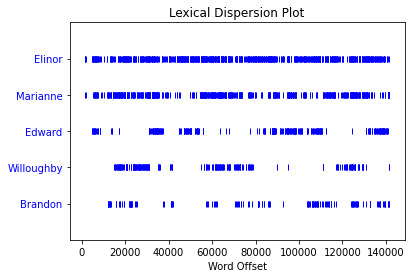

In [ ]:
text2.dispersion_plot(["Elinor", "Marianne", "Edward", "Willoughby", "Brandon"])

In [ ]:
len(set(text4))

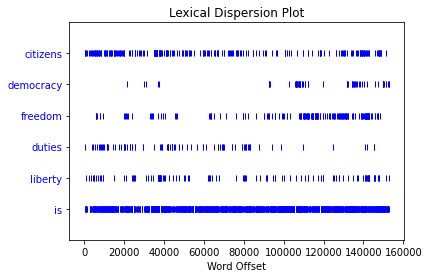

In [ ]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "liberty", "is"])

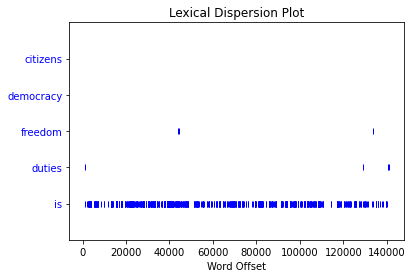

In [ ]:
text2.dispersion_plot(["citizens", "democracy", "freedom", "duties", "is"])

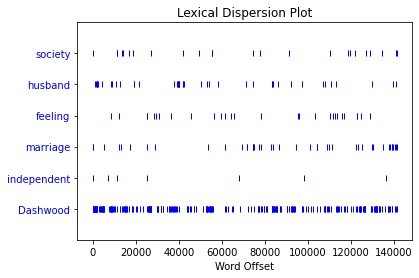

In [ ]:
text2.dispersion_plot(["society", "husband", "feeling", "marriage", "independent", "Dashwood"])

**Note**

*You can also plot the frequency of word usage through time using `https://books.google.com/ngrams`*

Now, just for fun, let's try generating some random text in the various styles we have just seen. To do this, we type the name of the text followed by the term generate. (We need to include the parentheses, but there's nothing that goes between them.)

In [ ]:
text3.generate()

Building ngram index...


lamb for a burnt offering in the city . , duke Elah , duke Shobal ,
and Akan . and looked upon my affliction . Because the LORD God
amongst the trees of the mighty God of Abraham his father , that they
found a plain man , and the wo The blessings of my hand to do justice
and judgment ; that the LORD that spake unto me , and put him into the
ark , and for your little ones . they heard that they have brought it
unto Hagar , Sarai ' s brother will I slay


"lamb for a burnt offering in the city . , duke Elah , duke Shobal ,\nand Akan . and looked upon my affliction . Because the LORD God\namongst the trees of the mighty God of Abraham his father , that they\nfound a plain man , and the wo The blessings of my hand to do justice\nand judgment ; that the LORD that spake unto me , and put him into the\nark , and for your little ones . they heard that they have brought it\nunto Hagar , Sarai ' s brother will I slay"

**Note**

**The generate() method is not available in NLTK 3.0 but will be reinstated in a subsequent version.**

---

## 1.4   Counting Vocabulary    

The most obvious fact about texts that emerges from the preceding examples is that they differ in the vocabulary they use. In this section we will see how to use the computer to count the words in a text in a variety of useful ways. As before, you will jump right in and experiment with the Python interpreter, even though you may not have studied Python systematically yet. Test your understanding by modifying the examples, and trying the exercises at the end of the chapter.

Let's begin by finding out the length of a text from start to finish, in terms of the words and punctuation symbols that appear. We use the term len to get the length of something, which we'll apply here to the book of Genesis:

In [ ]:
len(text3)

So Genesis has 44,764 words and punctuation symbols, or "tokens." A token is the technical name for a sequence of characters — such as hairy, his, or :) — that we want to treat as a group. When we count the number of tokens in a text, say, the phrase to be or not to be, we are counting occurrences of these sequences. Thus, in our example phrase there are two occurrences of to, two of be, and one each of or and not. But there are only four distinct vocabulary items in this phrase. How many distinct words does the book of Genesis contain? To work this out in Python, we have to pose the question slightly differently. The vocabulary of a text is just the set of tokens that it uses, since in a set, all duplicates are collapsed together. In Python we can obtain the vocabulary items of text3 with the command: set(text3). When you do this, many screens of words will fly past. Now try the following:

In [ ]:
sorted(set(text3))

In [ ]:
len(set(text3))

By wrapping sorted() around the Python expression set(text3) [1], we obtain a sorted list of vocabulary items, beginning with various punctuation symbols and continuing with words starting with A. All capitalized words precede lowercase words. We discover the size of the vocabulary indirectly, by asking for the number of items in the set, and again we can use len to obtain this number [2]. Although it has 44,764 tokens, this book has only 2,789 distinct words, or "word types." A word type is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary. Our count of 2,789 items will include punctuation symbols, so we will generally call these unique items types instead of word types.

Now, let's calculate a measure of the lexical richness of the text. The next example shows us that the number of distinct words is just 6% of the total number of words, or equivalently that each word is used 16 times on average (remember if you're using Python 2, to start with from __future__ import division).

In [ ]:
len(set(text3)) / len(text3)


Next, let's focus on particular words. We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word:

In [ ]:
text3.count("smote")

In [ ]:
100 * text4.count('a') / len(text4)

**Note**

**Your Turn:** How many times does the word lol appear in text5? How much is this as a percentage of the total number of words in this text?

You may want to repeat such calculations on several texts, but it is tedious to keep retyping the formula. Instead, you can come up with your own name for a task, like "lexical_diversity" or "percentage", and associate it with a block of code. Now you only have to type a short name instead of one or more complete lines of Python code, and you can re-use it as often as you like. The block of code that does a task for us is called a function, and we define a short name for our function with the keyword def. The next example shows how to define two new functions, lexical_diversity() and percentage():

In [ ]:
def lexical_diversity(text): #1#
    """ function to calculate diversity of vocabulary """
    return len(set(text)) / len(text) #2#

In [ ]:
def percentage(count, total): #3#
    """ function to calculate a percentage of total """
    return 100 * count / total

In the definition of lexical_diversity() [1], we specify a parameter named text. This parameter is a "placeholder" for the actual text whose lexical diversity we want to compute, and reoccurs in the block of code that will run when the function is used [2]. Similarly, percentage() is defined to take two parameters, named count and total [3].

Once Python knows that lexical_diversity() and percentage() are the names for specific blocks of code, we can go ahead and use these functions:

In [ ]:
lexical_diversity(text3)

In [ ]:
lexical_diversity(text5)

In [ ]:
print(percentage(4, 5))
print(percentage(text4.count('a'), len(text4)))

To recap, we use or call a function such as lexical_diversity() by typing its name, followed by an open parenthesis, the name of the text, and then a close parenthesis. These parentheses will show up often; their role is to separate the name of a task — such as lexical_diversity() — from the data that the task is to be performed on — such as text3. The data value that we place in the parentheses when we call a function is an argument to the function.

You have already encountered several functions in this chapter, such as len(), set(), and sorted(). By convention, we will always add an empty pair of parentheses after a function name, as in len(), just to make clear that what we are talking about is a function rather than some other kind of Python expression. Functions are an important concept in programming, and we only mention them at the outset to give newcomers a sense of the power and creativity of programming. Don't worry if you find it a bit confusing right now.

Later we'll see how to use functions when tabulating data, as in 1.1. Each row of the table will involve the same computation but with different data, and we'll do this repetitive work using a function.



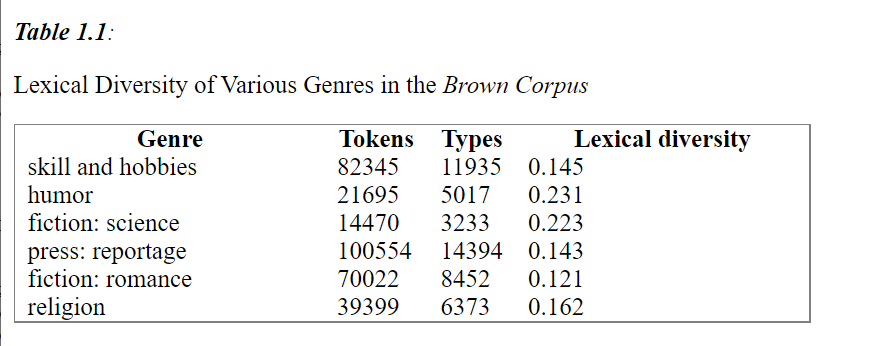

**Note**

**Your Turn:** Can you create the values in the Table 1.1 columns for each genre?

**Here are some additional practice exercises.**

---

In [ ]:
len(text2)

In [ ]:
len(set(text2))

In [ ]:
len(set(text2))/len(text2)

In [ ]:
len(set(text3)-set(stopwords))

In [ ]:
fdist1 = FreqDist(text1)

In [ ]:
fdist1.most_common(50) 

In [ ]:
fdist2 = FreqDist(text2)

In [ ]:
len(fdist2)

In [ ]:
fdist2.most_common(50) 

Find 50 most frequent words for Sense and Sensibility that are not stopwords

In [ ]:
fdist2[',']

In [ ]:
counter = 0
for item in fdist2.most_common():
  if item[0] not in stopwords:
    print(item)
    counter += 1
    if (counter == 49):
      break

In [ ]:
170/len(text2)

---